![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

# 04 | Overfitting & Hyperparameter Tuning with Cross Validation

## Chapter Importance

We have already covered:

1. Regression Models
2. Classification Models
3. Train Test Split for Model Selection

In short, we have computed all possible types of models to predict numerical and categorical variables with Regression and Classification models, respectively.

Although it is not enough with computing one model, we need to compare different models to choose the one whose predictions are close to reality.

Nevertheless, we cannot evaluate the model on the same data we used to `.fit()` (train) the mathematical equation (model). We need to separate the data into train and test sets; the first to train the model, the later to evaluate the model.

No we add an extra layer of complexity because we can improve a model (an algorithm) by configuring its parameters. This chapter is all about **computing different combinations of a single model's hyperparameters** to get the best.

## [ ] Load the [Data](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset)

- The goal of this dataset is
- To predict if **bank's customers** (rows) `default` next month
- Based on their **socio-demographical characteristics** (columns)

In [58]:
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
df_credit = pd.read_excel(io=url, header=1, index_col=0)
df_credit.sample(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
21099,270000,1,1,2,34,1,2,0,0,2,0,20979,17228,20924,22448,15490,17343,0,4000,2000,0,2000,2000,0
13803,50000,1,3,2,46,1,2,0,0,0,0,49220,48161,49310,49725,49910,48694,0,2000,1900,2007,2000,2012,1
28194,160000,2,3,1,46,-2,-2,-2,-2,-2,-2,-510,-520,0,-390,780,0,380,2000,0,101170,0,0,0
27236,100000,1,1,2,31,1,2,2,0,0,2,20505,22553,21904,23531,24636,25592,2700,0,2000,1500,1500,0,0
12235,110000,1,2,1,30,0,0,2,0,0,0,100908,105371,52113,53317,54040,54805,7000,0,2053,2500,2200,2156,1
10186,150000,2,3,1,40,0,0,0,0,0,0,56690,58775,62769,64233,65704,69835,3606,5600,2500,2500,5400,2600,1
3225,130000,2,3,1,25,0,0,0,0,0,0,132110,133734,129299,131871,132168,129779,6359,4505,4530,4798,4600,4655,0
4186,230000,1,1,2,30,1,-2,-2,-2,-1,-1,0,0,0,0,625,514,0,0,0,625,514,3,0
28619,270000,2,4,2,42,-2,-2,-2,-2,-2,-2,14352,1843,9190,2072,637,238,1859,9190,2072,637,238,0,0


## Preprocess the Data

### Missing Data

In [59]:
#df_credit.dropna();

### Dummy Variables

In [60]:
#Son necesarias las dummys? no veo string
#pd.get_dummies(data=df_credit,drop_first=True);

## Feature Selection

In [61]:
X = df_credit.drop(columns="default payment next month")
y = df_credit["default payment next month"]

## Train Test Split

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## [ ] `DecisionTreeClassifier()` with Default Hyperparameters

In [64]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()

In [65]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

### Accuracy

#### In `train` data

In [66]:
model_dt.score(X_train,y_train)

0.9995024875621891

#### In `test` data

In [67]:
model_dt.score(X_test,y_test)

0.7250505050505051

### Model Visualization

In [68]:
from sklearn.tree import plot_tree

In [69]:
#plot_tree(model_dt, feature_names=X.columns,filled=True);

## `DecisionTreeClassifier()` with Custom Hyperparameters

### 1st Configuration

In [70]:
model_dt = DecisionTreeClassifier(max_depth=3)

#### Accuracy

##### In `train` data

In [71]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [72]:
model_dt.score(X_train, y_train)

0.8207960199004976

##### In `test` data

In [73]:
model_dt.score(X_test,y_test)

0.8222222222222222

#### Model Visualization

In [74]:
import matplotlib.pyplot as plt

In [75]:
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

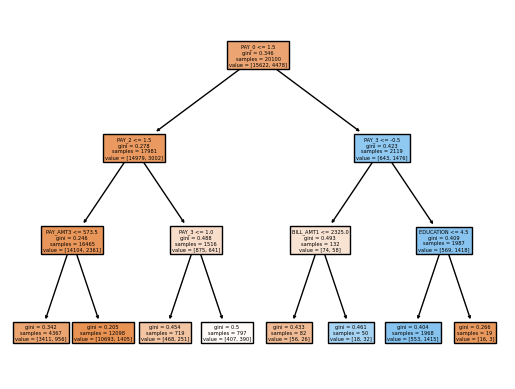

In [76]:
plot_tree(model_dt, feature_names=X.columns,filled=True);

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F4756451%2F5724f9841b58cbd7838a851ac6df659b%2Frpqa6.jpg?generation=1608831884903054&alt=media)

### [ ] 2nd Configuration

#### Accuracy

##### In `train` data

##### In `test` data

#### Model Visualization

### 3rd Configuration

### 4th Configuration

### 5th Configuration

## [ ] `GridSearchCV()` to find Best Hyperparameters

In [77]:
from sklearn.model_selection import GridSearchCV

In [82]:
model_dt = DecisionTreeClassifier()

In [83]:
model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [84]:
param_grid_dt = {
    'max_depth': [None,2,3],
    'min_samples_leaf': [1,10,20],
    'criterion': ['gini','entropy']
    
}

In [85]:
cv_dt = GridSearchCV(estimator=model_dt,param_grid=param_grid_dt)

In [87]:
cv_dt.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3],
                         'min_samples_leaf': [1, 10, 20]})

In [88]:
cv_dt.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [96]:
pd.DataFrame(cv_dt.cv_results_);

<img src="src/grid_search_cross_validation.png" style="margin-top: 100px"/>

## [ ] Other Models

Now let's try to find the best hyperparameter configuration of other models, which don't have the same hyperparameters than the Decision Tree because their algorithm and mathematical equation are different.

### Support Vector Machines `SVC()`

In [54]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/efR1C6CvhmE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [91]:
from sklearn.svm import SVC

In [92]:
model_sv = SVC()

In [95]:
model_sv.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [113]:
param_grid_sv = {
    'C':[0.1,1],
    'kernel':['linear','rbf']
}

In [114]:
cv_sv = GridSearchCV(estimator=model_sv, param_grid=param_grid_sv)

In [115]:
from sklearn.preprocessing import MinMaxScaler

In [116]:
scaler = MinMaxScaler()

In [137]:
scaler.fit(X=X_train)

MinMaxScaler()

In [ ]:
scaler.fit()

In [118]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index= X_train.index)

In [119]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index= X_test.index)

In [120]:
cv_sv.fit(X=X_train_scaled, y=y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1], 'kernel': ['linear', 'rbf']})

In [131]:
cv_sv.best_estimator_

SVC(C=1)

### K Nearest Neighbors`KNeighborsClassifier()`

In [122]:
from sklearn.neighbors import KNeighborsClassifier

In [123]:
model_kn = KNeighborsClassifier()

In [124]:
model_kn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [125]:
param_grid_kn={
    'leaf_size': [10,30],
    'metric': ['minkowski', 'manhattan'],
    'n_neighbors': [1,3,5]
}

In [128]:
cv_kn = GridSearchCV(estimator=model_kn, param_grid=param_grid_kn, verbose=2)

In [129]:
cv_kn.fit(X=X_train_scaled, y=y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=1; total time=   0.4s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=1; total time=   0.4s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=1; total time=   0.4s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=1; total time=   0.4s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=1; total time=   0.5s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   0.5s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   0.4s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   0.4s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   0.4s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   0.4s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   0.4s
[CV] END ......leaf_size=10, metric=minkowski, n

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 30],
                         'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': [1, 3, 5]},
             verbose=2)

In [130]:
cv_kn.best_estimator_

KNeighborsClassifier(leaf_size=10)

## [ ] Best Model with Best Hyperparameters

In [139]:
dic_results={
    'model':[
            cv_dt.best_estimator_,
            cv_sv.best_estimator_,
            cv_kn.best_estimator_
    ],
    'hyperparameters':[
            cv_dt.best_params_,
            cv_sv.best_params_,
            cv_kn.best_params_
    ],
    'score':[
            cv_dt.score(X_test, y=y_test),
            cv_sv.score(X_test_scaled, y=y_test),
            cv_kn.score(X_test_scaled, y=y_test)
    ]
}


In [143]:
df_res = pd.DataFrame(dic_results)

In [144]:
df_res.style.background_gradient()

,model,hyperparameters,score
0,DecisionTreeClassifier(max_depth=3),"{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}",0.822222
1,SVC(C=1),"{'C': 1, 'kernel': 'rbf'}",0.816566
2,KNeighborsClassifier(leaf_size=10),"{'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 5}",0.795253


<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.